In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from gait_analysis import *
import os

In [2]:
# run in tardi_gait folder, which has all of the necessary scripts
# also in this folder = a folder called analyzed_movies, which contains folders of data for a bunch of experiments

# First, get a list of available experiments
main_dir = os.getcwd()
os.chdir(os.path.join(main_dir,'comps'))

dir_list = listDirectories()
for d in dir_list:
    print(d)

group1
group2


In [11]:
# select an experiment to analyze
experiment_dir = 'group2'

# LOOK IN MULTIPLE FOLDERS AND COMBINE DATA
fname = 'all_step_data_swings.csv' # created by the script save_step_data.py
step_data = experimentToDf(experiment_dir,fname)
step_data.head(3)


Choose from this list (separate by commas if multiple choices): 
1: 2a001-016
2: 2b007-024
3: 2b087-100
4: 2b064-081
5: 2a022-032
6: 2b030-055
7: select ALL

Which number(s) do you want? 7

You chose them all

Found 2a001-016/all_step_data_swings.csv
Found 2b007-024/all_step_data_swings.csv
Found 2b087-100/all_step_data_swings.csv
Found 2b064-081/all_step_data_swings.csv
Found 2a022-032/all_step_data_swings.csv
Found 2b030-055/all_step_data_swings.csv


,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,clip
0,R4,1.100,2.268,1.168,0.433,1.601,0.7295,2.4845,R4:0.8648,R3:0.2917,R2:0.5418,R1:0.8438,L1:0.2502;0.7399,L2:,L3:0.8335,L4:0.4063,2a001-016
1,R4,2.701,3.969,1.268,0.600,1.868,0.6788,4.2690,R4:0.8394,R3:0.2679,R2:0.5806,R1:0.7768,L1:0.1697;0.5359,L2:0.2947,L3:0.8215,L4:0.3841,2a001-016
2,R4,4.569,5.903,1.334,0.567,1.901,0.7017,6.1865,R4:0.8509,R3:0.1931,R2:0.43,R1:0.6142,L1:0.2722,L2:0.1142;0.8598,L3:0.6142,L4:0.0968,2a001-016


2b007-024
2a001-016
2a022-032
2b087-100
2b064-081
2b030-055


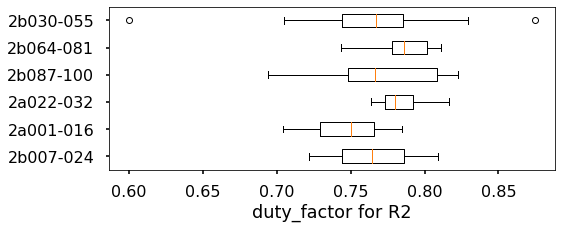

In [12]:
# Quality control, 
# e.g. how consistent is a given parameter between the different clips?

clips = list(set(step_data['clip'].values))
parameter = 'duty_factor' # stance_time, swing_time, duty_factor, gait_cycle
leg = 'R2'
data_to_plot = []
for clip in clips:
    print(clip)
    data_for_clip = step_data[step_data['clip'] == clip]
    data_for_leg = data_for_clip[data_for_clip['ref_leg']==leg]
    data_for_parameter = data_for_leg[parameter].values
    data_to_plot.append(data_for_parameter)
    
f = plt.figure(figsize = (8,3))
plt.boxplot(data_to_plot, vert=False)
locs, labels = plt.yticks()
labels = clips
plt.yticks(locs,labels)
plt.xlabel(parameter + ' for ' + leg)
plt.show()

In [13]:
# set up interesting leg groupings
leg_combos = get_leg_combos()
for combo in leg_combos.keys():
    print(combo, leg_combos[combo])

legs_all ['L4', 'L3', 'L2', 'L1', 'R1', 'R2', 'R3', 'R4']
legs_lateral ['L3', 'L2', 'L1', 'R1', 'R2', 'R3']
legs_all_right ['R4', 'R3', 'R2', 'R1']
legs_all_left ['L4', 'L3', 'L2', 'L1']
legs_right ['R3', 'R2', 'R1']
legs_left ['L3', 'L2', 'L1']
legs_1 ['R1', 'L1']
legs_2 ['R2', 'L2']
legs_3 ['R3', 'L3']
legs_4 ['R4', 'L4']


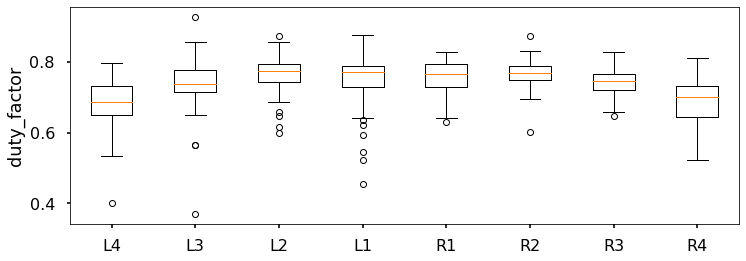

In [14]:
# Quality control, 
# e.g. what are gait parameters for different legs?

leg_set = leg_combos['legs_all']
parameter = 'duty_factor' # stance_time, swing_time, duty_factor, gait_cycle

leg_data = []
for leg in leg_set:
    data_for_leg = step_data[step_data['ref_leg']==leg][parameter].values
    leg_data.append(data_for_leg)

plt.style.use('seaborn-poster') #seaborn-whitegrid seaborn-paper seaborn-talk seaborn-poster
fig_widgth = int(np.round(len(leg_set)*1.5))
f = plt.figure(figsize = (fig_widgth,4))
plt.boxplot(leg_data)
locs, labels = plt.xticks()
labels = leg_set
plt.xticks(locs,labels)
plt.ylabel(parameter)
plt.show()

In [15]:
# get step stats for a group of legs
all_legs = leg_combos['legs_all']
legs = all_legs
leg_data = {}

for leg in legs:
    leg_data[leg]={}
    leg_data[leg]['stances'] = step_data[step_data.ref_leg == leg]['stance_time'].values
    leg_data[leg]['swings'] = step_data[step_data.ref_leg == leg]['swing_time'].values

In [16]:
for leg in all_legs:
    print(leg,np.mean(leg_data[leg]['stances']))

L4 1.0385689655172412
L3 1.1265789473684211
L2 1.0879
L1 0.9330416666666667
R1 0.9485352112676055
R2 1.1201833333333335
R3 1.1173103448275863
R4 1.0426206896551724


In [17]:
# set up a figure and some axes
def leg_plot(leg_data, legs_in_plot, rec_height = 0.8):
    fig_width = 16
    fig_height = 0.6 * len(legs_in_plot)
    
    y_levels = np.arange(len(legs_in_plot)) + 0.5
    y_levels_for_legs = dict(zip(legs_in_plot,y_levels))

    stance_color = [0.2,0.2,0.2]
    swing_color = [0.9,0.9,0.9]
    
    (f, ax) = plt.subplots(1, figsize=(fig_width, fig_height))
    
    ax.set_yticks(y_levels)
    ax.set_yticklabels(legs, fontsize=12)
    plt.xticks(fontsize=12)
    ax.set_xlim([-0.2,2])
    buffer = rec_height/2 + 0.2
    ax.set_ylim([np.min(y_levels)-buffer, np.max(y_levels)+buffer])
    ax.set_ylabel('Legs', fontsize=16)
    ax.set_xlabel('Time (sec)', fontsize=16)
    
    return f, ax, y_levels_for_legs, rec_height, stance_color, swing_color

# plot stance and swing data on a figure
def plot_stance_swing(f, ax, leg, leg_data, start_x, rec_height, stance_color, swing_color):
    
    stances = leg_data[leg]['stances']
    swings = leg_data[leg]['swings']
    
    # add rectangle for stance
    ax.add_patch(Rectangle((start_x, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))

    # add error bar for stance

    # add rectangle for swing
    ax.add_patch(Rectangle((start_x + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), np.mean(swings), rec_height, 
                           edgecolor='k', facecolor=swing_color, lw=1))

    # add error bar for swing

    # add steps on either side of this one
    gait_cycle = np.mean(stances) + np.mean(swings)
    
    # to left
    left_start = start_x - gait_cycle
    ax.add_patch(Rectangle((left_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((left_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    left_start = start_x - 2 * gait_cycle
    ax.add_patch(Rectangle((left_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((left_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    # to right
    right_start = start_x + gait_cycle
    ax.add_patch(Rectangle((right_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((right_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    right_start = start_x + 2 * gait_cycle
    ax.add_patch(Rectangle((right_start, y_levels_for_legs[leg] - rec_height/2), np.mean(stances), rec_height, 
                           edgecolor='k', facecolor=stance_color, lw=1))
    ax.add_patch(Rectangle((right_start + np.mean(stances), y_levels_for_legs[leg] - rec_height/2), 
                           np.mean(swings), rec_height, edgecolor='k', facecolor=swing_color, lw=1))
    
    return f, ax

def get_mid_swing_timing(leg_1,leg_2):
    
    other_leg_mid_swing_col = leg_2 + '_mid_swings'
    other_leg_mid_swing_strings = step_data[step_data.ref_leg==leg_1][other_leg_mid_swing_col].values

    other_leg_mid_swing_data = [x.split(':')[1] for x in other_leg_mid_swing_strings]

    mid_swing_timing = []

    for item in other_leg_mid_swing_data:
        if ';' in item:
            stuff = [float(x) for x in item.split(';')]
            mid_swing_timing.extend(stuff)
        elif len(item)>0:
            mid_swing_timing.append(float(item))

    return(mid_swing_timing)

def get_swing_leg_start(step_leg, swing_leg, mid_swing_timing):
    mid_swing_timing = get_mid_swing_timing(step_leg, swing_leg)
    mid_swing_time = np.mean(mid_swing_timing)
    
    # find start_x for this leg
    # mid_swing_timing is expressed as % of gait_cycle of start leg
    # convert to real time
    mid_swing_secs = mid_swing_time * start_leg_gait_cycle
    
    # from this mid swing time, find start of gait cycle for other leg 
    # it will be mid_swing - half of swing - stance
    swing_leg_stance = np.mean(leg_data[swing_leg]['stances'])
    swing_leg_swing = np.mean(leg_data[swing_leg]['swings'])
    
    start_gait_leg =  mid_swing_secs - swing_leg_swing / 2 - swing_leg_stance
    return start_gait_leg

start leg:  L3
opposite leg:  R3
other_lateral_legs ['L2', 'L1']
other_opposite_legs ['R2', 'R1']


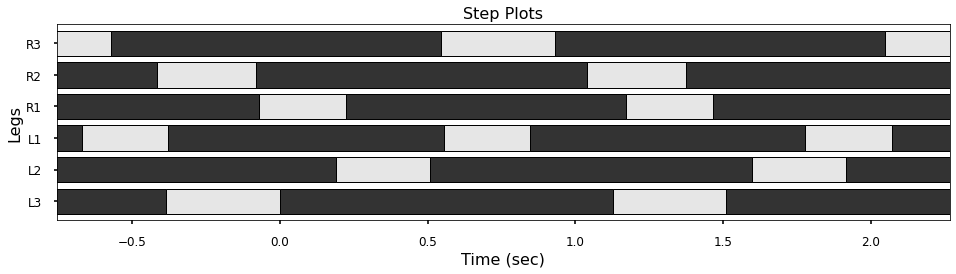

In [20]:
lateral_legs = leg_combos['legs_lateral']
right_lateral = leg_combos['legs_right']
left_lateral = leg_combos['legs_left']
legs = lateral_legs

start_leg = 'L3'
if 'R' in start_leg:
    opposite_leg = 'L' + start_leg[1]
else:
    opposite_leg = 'R' + start_leg[1]
print('start leg: ', start_leg)
print('opposite leg: ',opposite_leg)

start_leg_stance = np.mean(leg_data[start_leg]['stances'])
start_leg_swing = np.mean(leg_data[start_leg]['swings'])
start_leg_gait_cycle = start_leg_stance + start_leg_swing

# set up a figure
f, ax, y_levels_for_legs, rec_height, stance_color, swing_color = leg_plot(leg_data,legs)

# make a plot for starting leg
start_gait = 0
f, ax = plot_stance_swing(f, ax, start_leg, leg_data, start_gait, rec_height, stance_color, swing_color)

# get ipsilateral and contralateral legs for starting leg
if start_leg in lateral_legs:
    if 'R' in start_leg:
        other_lateral_legs = right_lateral.copy()
        other_opposite_legs = left_lateral.copy()
    else:
        other_lateral_legs = left_lateral.copy()
        other_opposite_legs = right_lateral.copy()
other_lateral_legs.remove(start_leg)
other_opposite_legs.remove(opposite_leg)
print('other_lateral_legs', other_lateral_legs)
print('other_opposite_legs', other_opposite_legs)

# add other ipsilateral legs to plot ... this is good
for ipsilateral_leg in other_lateral_legs:
    mid_swing_timing = get_mid_swing_timing(start_leg, ipsilateral_leg)
    start_gait_leg = get_swing_leg_start(start_leg, ipsilateral_leg, mid_swing_timing)  
    f, ax = plot_stance_swing(f, ax, ipsilateral_leg, leg_data, start_gait_leg, 
                              rec_height, stance_color, swing_color)

# add opposite leg to plot ... this is good
mid_swing_timing = get_mid_swing_timing(start_leg, opposite_leg)
start_gait_opposite_leg = get_swing_leg_start(start_leg, opposite_leg, mid_swing_timing)
f, ax = plot_stance_swing(f, ax, opposite_leg, leg_data, start_gait_opposite_leg, 
                          rec_height, stance_color, swing_color)

# add other contralateral legs to plot ... check ... use start_leg or opposite_leg to set timing?
for contralateral_leg in other_opposite_legs:
    mid_swing_timing = get_mid_swing_timing(opposite_leg, contralateral_leg)
    start_gait_leg = get_swing_leg_start(opposite_leg, contralateral_leg, mid_swing_timing)
    start_gait_leg += start_gait_opposite_leg
    f, ax = plot_stance_swing(f, ax, contralateral_leg, leg_data, start_gait_leg, 
                              rec_height, stance_color, swing_color)

right_lim = 1.5 * start_leg_gait_cycle
left_lim = -0.5 * start_leg_gait_cycle
# ax.set_xlim(-0.4215208333333333, 1.2645624999999998)
ax.set_xlim(left_lim,right_lim)
plt.title('Step Plots', fontsize=16)
# plt.title(experiment_dir.replace('_',' '), fontsize=16)
plt.savefig('step_plot.png',dpi=150)
plt.show()

In [19]:
print(right_lim, left_lim)

2.1122 -0.7040666666666667
